<a href="https://colab.research.google.com/github/Bhagy4047/Rock-Paper-Scissors-Prediction/blob/main/final_Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [ ]:
pip install -q tensorflow tensorflow-datasets

## Import Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

## Find Datasets

In [ ]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

## Get information on the Data

In [ ]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }"""

## Prepare Rock, Paper, Scissors Data

In [ ]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

## Show Examples

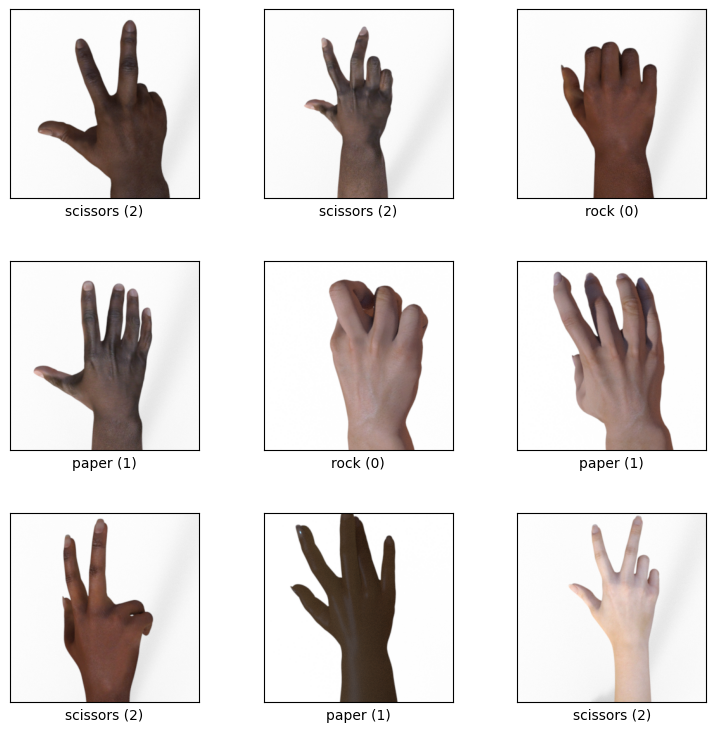

In [ ]:
fig = tfds.show_examples(ds_train,info)

## Additional Data Prep

In [ ]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [ ]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

## Train a network (basic approach)

In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 3s 16ms/step - loss: 32.2933 - accuracy: 0.3710
Epoch 2/5
79/79 [==============================] - 1s 16ms/step - loss: 1.4286 - accuracy: 0.6615
Epoch 3/5
79/79 [==============================] - 1s 18ms/step - loss: 1.1775 - accuracy: 0.6996
Epoch 4/5
79/79 [==============================] - 1s 17ms/step - loss: 0.6703 - accuracy: 0.8206
Epoch 5/5
79/79 [==============================] - 1s 15ms/step - loss: 0.6027 - accuracy: 0.8294


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 1.7243 - accuracy: 0.5376


[1.7243112325668335, 0.5376344323158264]

## Train a Network (convolutional approach)

In [ ]:
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)



Epoch 1/5
79/79 [==============================] - 19s 167ms/step - loss: 2.4013 - accuracy: 0.6837
Epoch 2/5
79/79 [==============================] - 11s 138ms/step - loss: 0.4388 - accuracy: 0.9147
Epoch 3/5
79/79 [==============================] - 11s 138ms/step - loss: 0.2928 - accuracy: 0.9456
Epoch 4/5
79/79 [==============================] - 11s 138ms/step - loss: 0.0636 - accuracy: 0.9917
Epoch 5/5
79/79 [==============================] - 11s 138ms/step - loss: 0.0110 - accuracy: 0.9980


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 2s 142ms/step - loss: 1.6120 - accuracy: 0.5081


[1.611951470375061, 0.5080645084381104]

## A Better Convolutional Network

In [ ]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=15, batch_size=32)

Epoch 1/15
79/79 [==============================] - 5s 34ms/step - loss: 1.0111 - accuracy: 0.6774
Epoch 2/15
79/79 [==============================] - 2s 29ms/step - loss: 0.1626 - accuracy: 0.9639
Epoch 3/15
79/79 [==============================] - 2s 29ms/step - loss: 0.0555 - accuracy: 0.9893
Epoch 4/15
79/79 [==============================] - 2s 31ms/step - loss: 0.0182 - accuracy: 0.9968
Epoch 5/15
79/79 [==============================] - 2s 30ms/step - loss: 0.0122 - accuracy: 0.9980
Epoch 6/15
79/79 [==============================] - 2s 28ms/step - loss: 0.0087 - accuracy: 0.9984
Epoch 7/15
79/79 [==============================] - 2s 28ms/step - loss: 0.0059 - accuracy: 0.9992
Epoch 8/15
79/79 [==============================] - 2s 28ms/step - loss: 0.0077 - accuracy: 0.9988
Epoch 9/15
79/79 [==============================] - 2s 30ms/step - loss: 0.0215 - accuracy: 0.9952
Epoch 10/15
79/79 [==============================] - 2s 30ms/step - loss: 0.6133 - accuracy: 0.7266
Epoch 11/

In [ ]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 34ms/step - loss: 2.1635 - accuracy: 0.7231


[2.163536548614502, 0.7231183052062988]

## Hyperparameter Tuning

In [ ]:
pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.utils.vis_utils import plot_model
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))


  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Trial 32 Complete [00h 00m 38s]
val_accuracy: 0.7473118305206299

Best val_accuracy So Far: 0.801075279712677
Total elapsed time: 00h 12m 12s


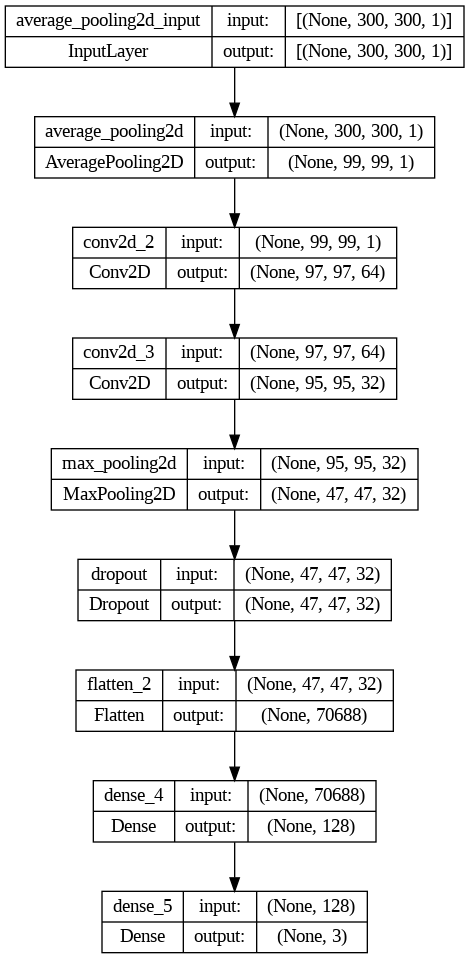

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 44.2 MB/s eta 0:00:00


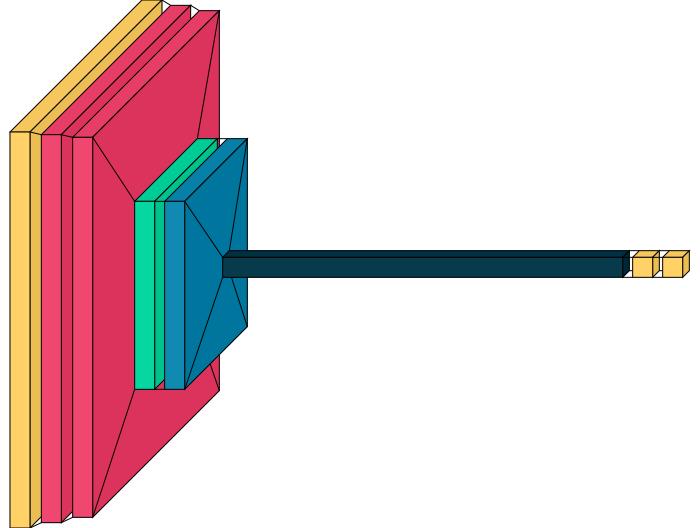

In [ ]:
import visualkeras
visualkeras.layered_view(model)

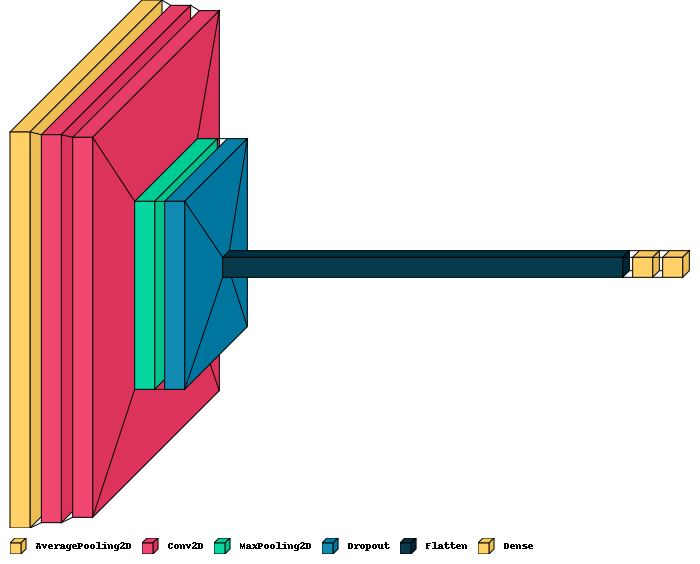

In [ ]:
visualkeras.layered_view(model, legend=True) # without custom font
visualkeras.layered_view(model, legend=True, font=None) # selected font

In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 10ms/step - loss: 0.6215 - accuracy: 0.8011


[0.6214532256126404, 0.801075279712677]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 99, 99, 1)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 flatten (Flatten)           (None, 70688)             0

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 512
layer_0_filters: 16
layer_1_filters: 32
Score: 0.801075279712677

Trial 27 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 128
layer_0_filters: 16
layer_1_filters: 32
layer_2_filters: 64
Score: 0.7849462628364563

Trial 03 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 512
layer_0_filters: 64
layer_1_filters: 64
layer_2_filters: 16
Score: 0.774193525314331

Trial 21 summary
Hyperparameters:
Conv Layers: 1
Dense layer: 512
layer_0_filters: 64
layer_1_filters: 32
layer_2_filters: 32
Score: 0.7661290168762207

Trial 04 summary
Hyperparameters:
Conv Layers: 3
Dense layer: 256
layer_0_filters: 64
layer_1_filters: 32
layer_2_filters: 16
Score: 0.7634408473968506

Trial 06 summary
Hyperparameters:
Conv Layers: 2
Dense layer: 64
layer_0_filters: 32
layer_1_filters: 16
layer_2_filters: 32
Score: 0.76075

# Miscellaneous Useful Techniques
## Save & Load our Models


In [ ]:
best_model.save('./my_model')

In [ ]:
loaded_model = keras.models.load_model('./my_model')

In [ ]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 9ms/step - loss: 0.6215 - accuracy: 0.8011


[0.6214532256126404, 0.801075279712677]

## Plot Image from Numpy Array

(300, 300, 3)

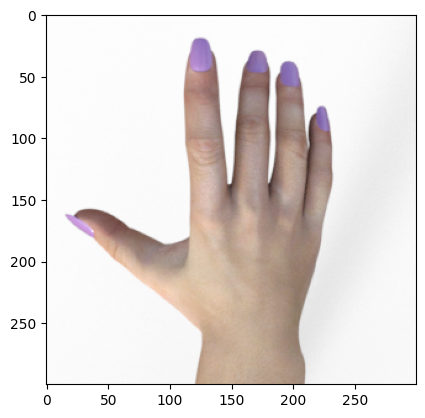

In [ ]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(20)])
rgb_image = rgb_images[15]
plt.imshow(rgb_image)
rgb_image.shape

## Use Model to Predict Result for Single Example

In [ ]:
result = best_model.predict(np.array([train_images[15]]))
print(result)

predicted_value = np.argmax(result)
print(predicted_value)

1/1 [==============================] - 0s 228ms/step
[[3.6913055e-04 9.9125099e-01 8.3798431e-03]]
1


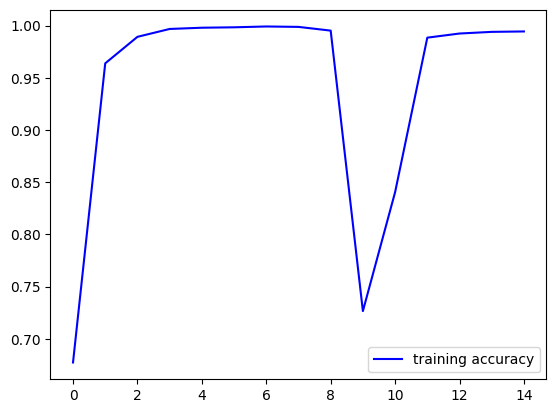

In [ ]:
accuracy=history.history['accuracy']
#val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
#val_loss=history.history['val_loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,"b",label="training accuracy")
#plt.plot(epochs,val_accuracy,"r",label="validation accuracy")
plt.legend()
plt.show()
